<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [2]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2024-12-11 19:01:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  56.5MB/s    in 3.6s    

2024-12-11 19:01:53 (56.2 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [1]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 101.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 102.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 35.0 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 105.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 98.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 94.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 10.5 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


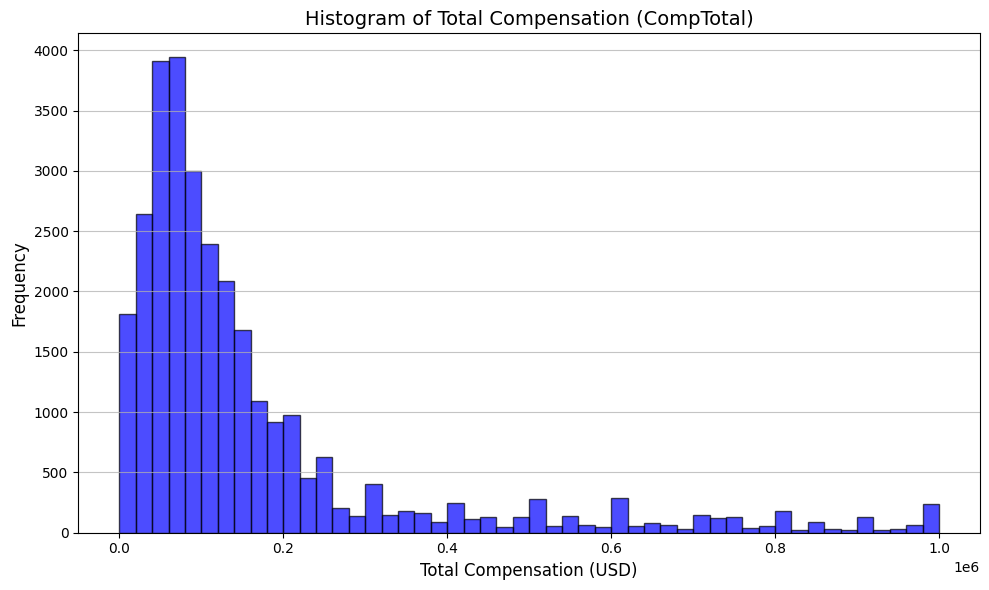

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to retrieve the CompTotal column
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL
"""

# Load the data into a DataFrame
df_comp_total = pd.read_sql_query(QUERY, conn)

# Convert CompTotal to numeric (if it's stored as a string) and handle any potential conversion issues
df_comp_total['CompTotal'] = pd.to_numeric(df_comp_total['CompTotal'], errors='coerce')

# Drop rows with NaN values resulting from non-numeric entries
df_comp_total = df_comp_total.dropna()

# Filter out extreme outliers (e.g., only keep values less than or equal to 1,000,000)
df_comp_total = df_comp_total[df_comp_total['CompTotal'] <= 1_000_000]

# Plot a histogram of CompTotal after filtering
plt.figure(figsize=(10, 6))
plt.hist(df_comp_total['CompTotal'], bins=50, edgecolor='k', color='blue', alpha=0.7)
plt.title('Histogram of Total Compensation (CompTotal)', fontsize=14)
plt.xlabel('Total Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Show the plot
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


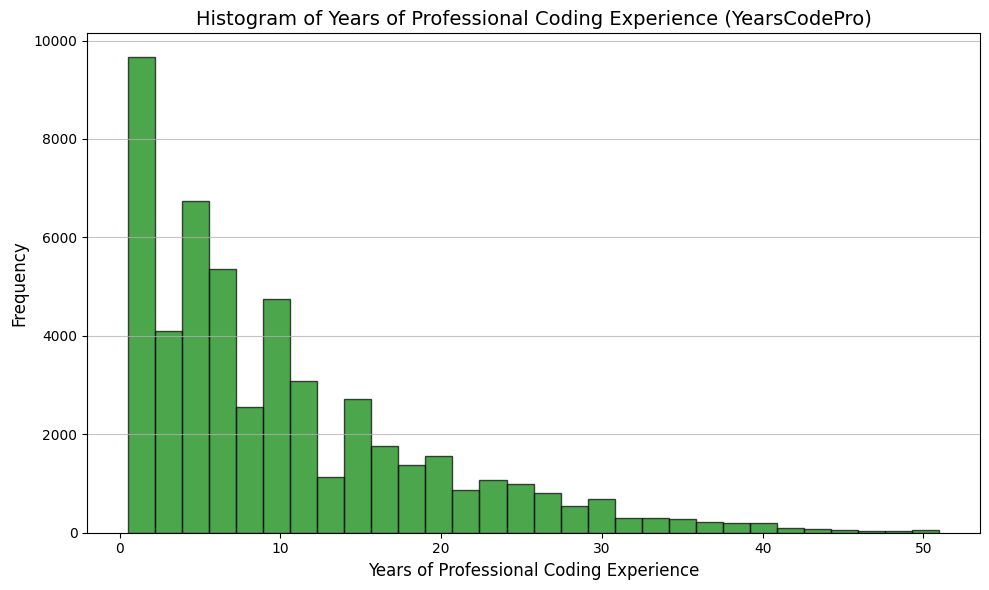

In [10]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to retrieve the YearsCodePro column
QUERY = """
SELECT YearsCodePro 
FROM main 
WHERE YearsCodePro IS NOT NULL
"""

# Load the data into a DataFrame
df_years_code_pro = pd.read_sql_query(QUERY, conn)

# Clean and process the data
# Convert YearsCodePro to numeric; handle 'Less than 1 year' and 'More than 50 years' cases
df_years_code_pro['YearsCodePro'] = df_years_code_pro['YearsCodePro'].replace({
    'Less than 1 year': 0.5, 
    'More than 50 years': 51
})
df_years_code_pro['YearsCodePro'] = pd.to_numeric(df_years_code_pro['YearsCodePro'], errors='coerce')

# Drop rows with NaN values resulting from non-numeric entries
df_years_code_pro = df_years_code_pro.dropna()

# Plot a histogram of YearsCodePro
plt.figure(figsize=(10, 6))
plt.hist(df_years_code_pro['YearsCodePro'], bins=30, edgecolor='k', color='green', alpha=0.7)
plt.title('Histogram of Years of Professional Coding Experience (YearsCodePro)', fontsize=14)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Show the plot
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


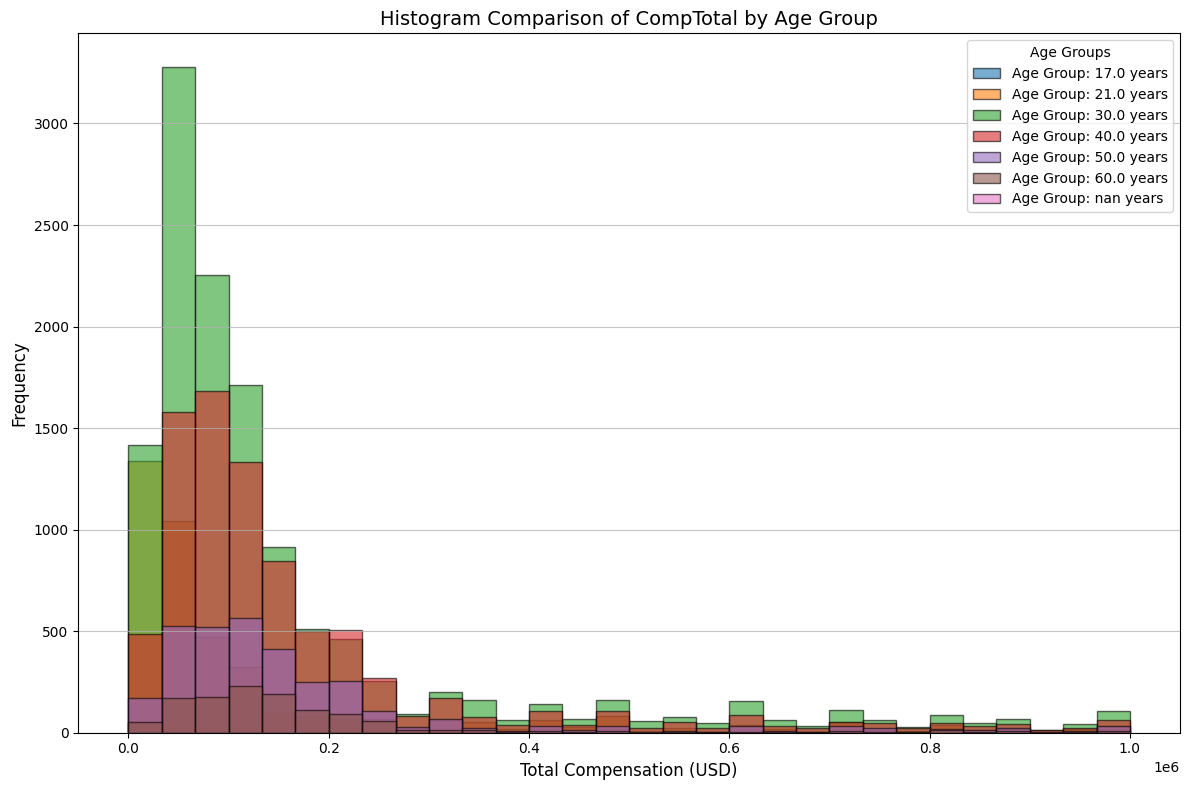

In [12]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to retrieve CompTotal and Age columns
QUERY = """
SELECT CompTotal, Age 
FROM main 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""

# Load the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Convert CompTotal to numeric and Age to categorical
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['CompTotal'] = df['CompTotal'].dropna()

# Filter out extreme outliers for CompTotal
df = df[df['CompTotal'] <= 1_000_000]

# Define age group mapping
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years and older': 70
}

# Map Age groups to numeric values
df['AgeGroup'] = df['Age'].map(age_mapping)

# List unique Age groups for comparison
unique_age_groups = sorted(df['AgeGroup'].unique())

# Plot histograms for each age group
plt.figure(figsize=(12, 8))

for age_group in unique_age_groups:
    subset = df[df['AgeGroup'] == age_group]
    plt.hist(
        subset['CompTotal'],
        bins=30,
        alpha=0.6,
        label=f'Age Group: {age_group} years',
        edgecolor='k'
    )

# Add legend, labels, and title
plt.title('Histogram Comparison of CompTotal by Age Group', fontsize=14)
plt.xlabel('Total Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Age Groups')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Show the plot
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


First few rows of the dataset:
                TimeSearching              Age
0         30-60 minutes a day  35-44 years old
1         30-60 minutes a day  35-44 years old
2        60-120 minutes a day  45-54 years old
3         15-30 minutes a day  25-34 years old
4  Less than 15 minutes a day  25-34 years old

Unique values in the Age column:
['35-44 years old' '45-54 years old' '25-34 years old' '55-64 years old'
 '18-24 years old' '65 years or older' 'Prefer not to say'
 'Under 18 years old']

Unique values in the TimeSearching column:
['30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']

Data after cleaning:
Empty DataFrame
Columns: [TimeSearching, Age]
Index: []

Data with AgeGroup mapping:
Empty DataFrame
Columns: [Age, AgeGroup]
Index: []


/tmp/ipykernel_84/3617037369.py:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Groups')


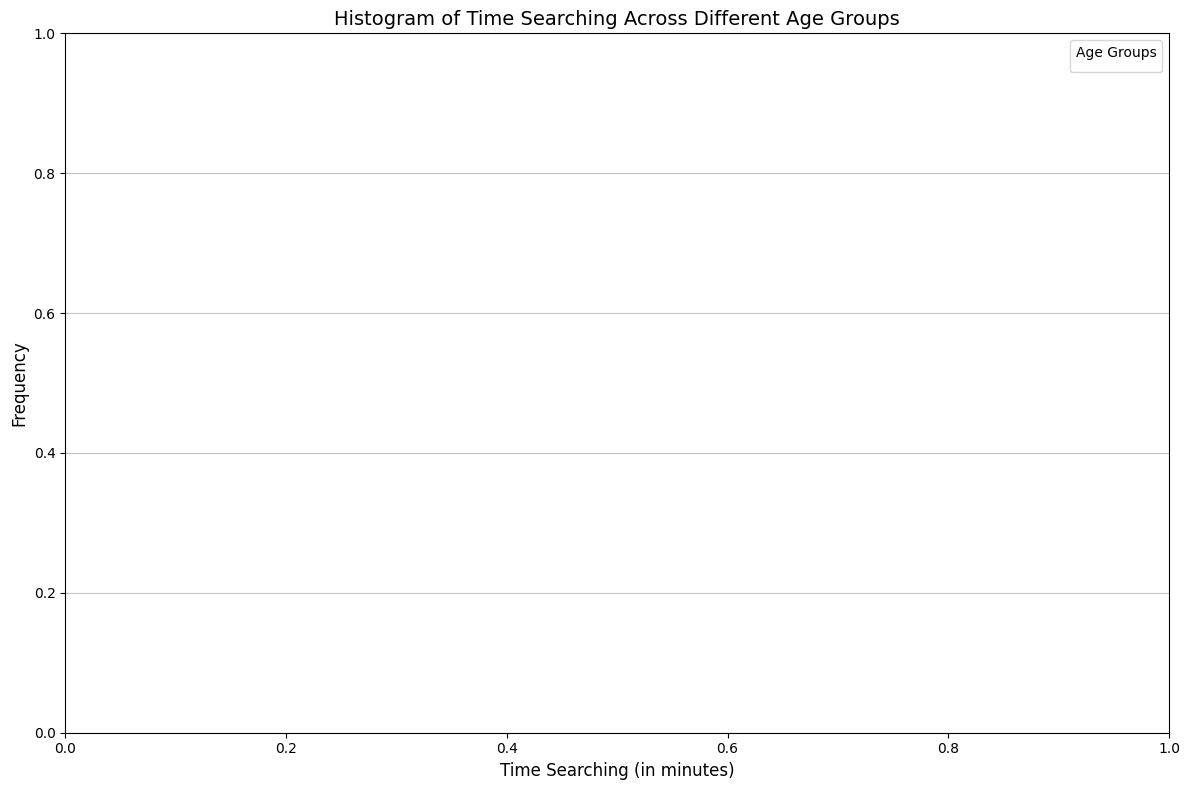

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to retrieve TimeSearching and Age columns
QUERY = """
SELECT TimeSearching, Age 
FROM main 
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL
"""

# Load the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Debugging: Print the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Debugging: Check unique values in the Age column
print("\nUnique values in the Age column:")
print(df['Age'].unique())

# Debugging: Check unique values in the TimeSearching column
print("\nUnique values in the TimeSearching column:")
print(df['TimeSearching'].unique())

# Convert TimeSearching to numeric if necessary (ensure it's numeric data)
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')

# Drop rows with NaN values
df = df.dropna()

# Debugging: Print the remaining rows after cleaning
print("\nData after cleaning:")
print(df.head())

# Define age group mapping
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years and older': 70
}

# Map Age groups to numeric values
df['AgeGroup'] = df['Age'].map(age_mapping)

# Debugging: Check if AgeGroup mapping worked correctly
print("\nData with AgeGroup mapping:")
print(df[['Age', 'AgeGroup']].drop_duplicates())

# List unique Age groups for comparison
unique_age_groups = sorted(df['AgeGroup'].dropna().unique())

# Plot histograms for TimeSearching across Age Groups
plt.figure(figsize=(12, 8))

for age_group in unique_age_groups:
    subset = df[df['AgeGroup'] == age_group]
    if not subset.empty:
        plt.hist(
            subset['TimeSearching'],
            bins=30,
            alpha=0.6,
            label=f'Age Group: {age_group} years',
            edgecolor='k'
        )

# Add legend, labels, and title
plt.title('Histogram of Time Searching Across Different Age Groups', fontsize=14)
plt.xlabel('Time Searching (in minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Age Groups')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Show the plot
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


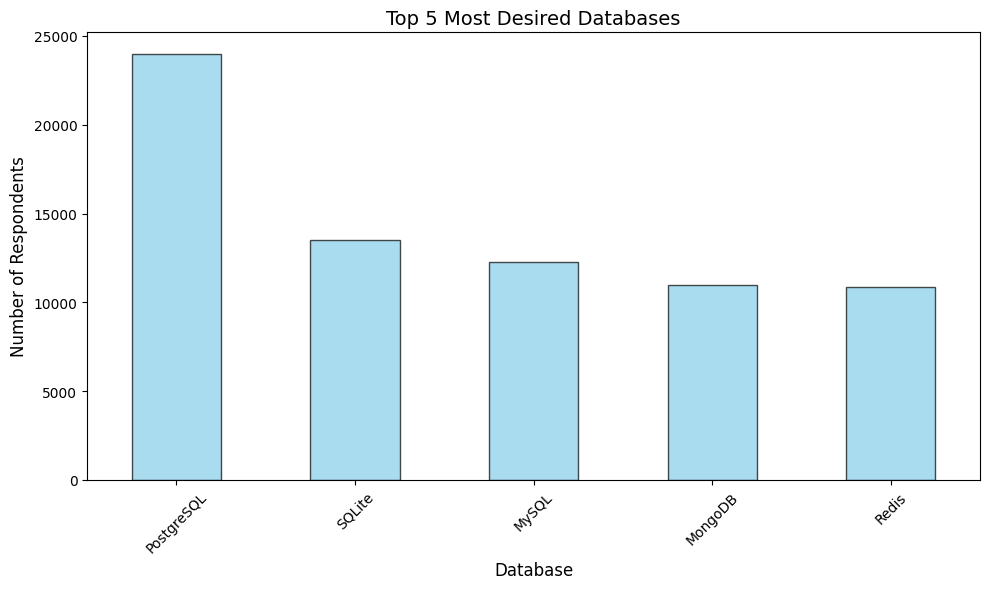

In [15]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to retrieve the DatabaseWantToWorkWith column
QUERY = """
SELECT DatabaseWantToWorkWith 
FROM main 
WHERE DatabaseWantToWorkWith IS NOT NULL
"""

# Load the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Split the semicolon-separated values into individual entries
all_databases = df['DatabaseWantToWorkWith'].str.split(';').explode()

# Count the occurrences of each database
database_counts = all_databases.value_counts()

# Select the top 5 most desired databases
top_5_databases = database_counts.head(5)

# Plot a histogram of the top 5 databases
plt.figure(figsize=(10, 6))
top_5_databases.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Top 5 Most Desired Databases', fontsize=14)
plt.xlabel('Database', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


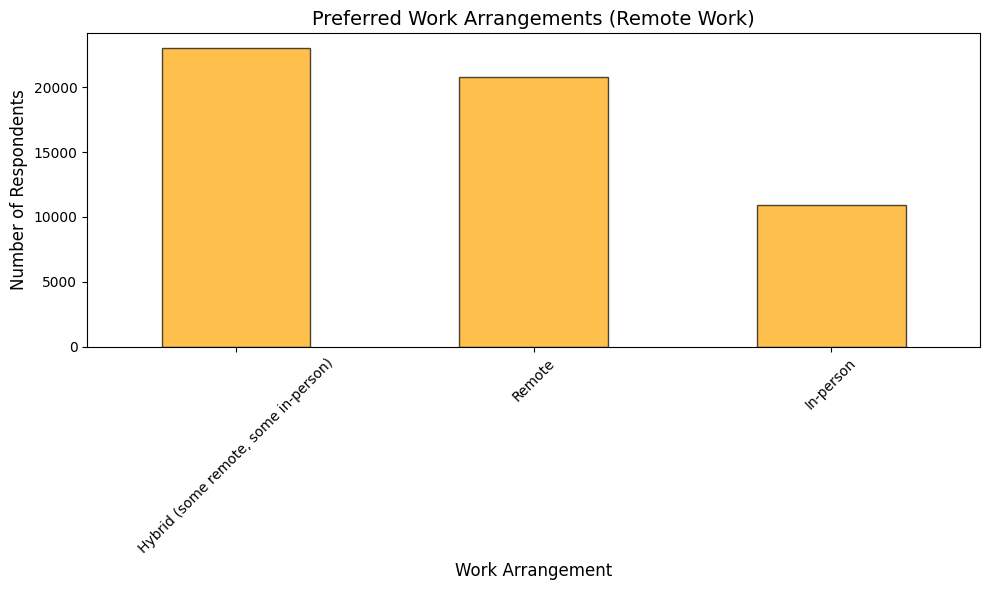

In [16]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to retrieve the RemoteWork column
QUERY = """
SELECT RemoteWork 
FROM main 
WHERE RemoteWork IS NOT NULL
"""

# Load the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each work arrangement
remote_work_counts = df['RemoteWork'].value_counts()

# Plot a histogram of preferred work arrangements
plt.figure(figsize=(10, 6))
remote_work_counts.plot(kind='bar', color='orange', edgecolor='k', alpha=0.7)
plt.title('Preferred Work Arrangements (Remote Work)', fontsize=14)
plt.xlabel('Work Arrangement', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


/tmp/ipykernel_84/2342191396.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompTotal'] = pd.to_numeric(df_filtered['CompTotal'], errors='coerce')


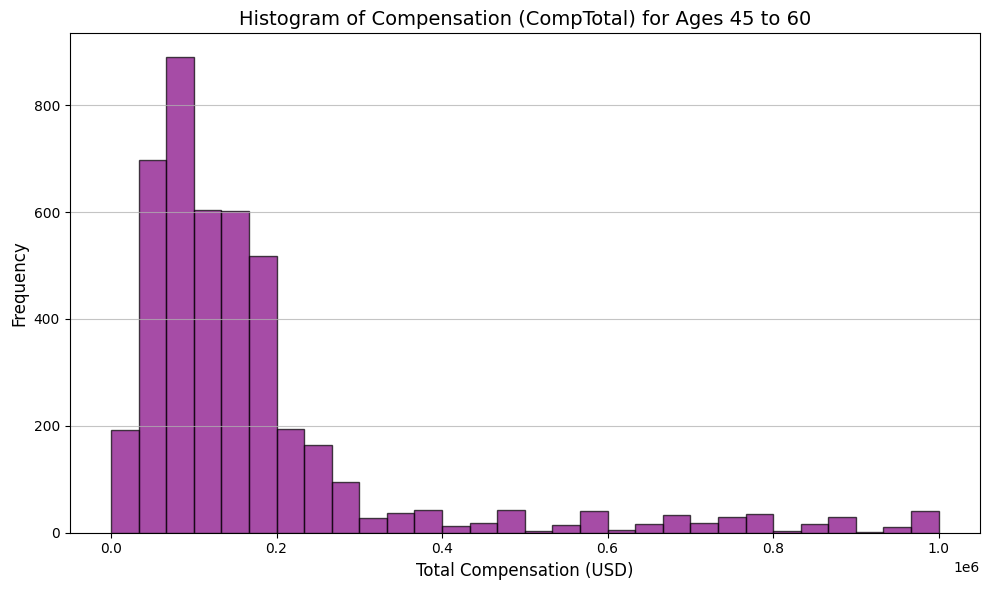

In [17]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to retrieve CompTotal and Age columns
QUERY = """
SELECT CompTotal, Age 
FROM main 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""

# Load the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Map Age groups to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years and older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Filter for the age group 45 to 60
df_filtered = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

# Convert CompTotal to numeric and handle invalid data
df_filtered['CompTotal'] = pd.to_numeric(df_filtered['CompTotal'], errors='coerce')

# Drop rows with NaN or extreme outliers (e.g., above $1,000,000)
df_filtered = df_filtered[(df_filtered['CompTotal'] <= 1_000_000) & (df_filtered['CompTotal'] > 0)]

# Plot a histogram for CompTotal
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=30, edgecolor='k', color='purple', alpha=0.7)
plt.title('Histogram of Compensation (CompTotal) for Ages 45 to 60', fontsize=14)
plt.xlabel('Total Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Show the plot
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


Unique JobSat values: [ 8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


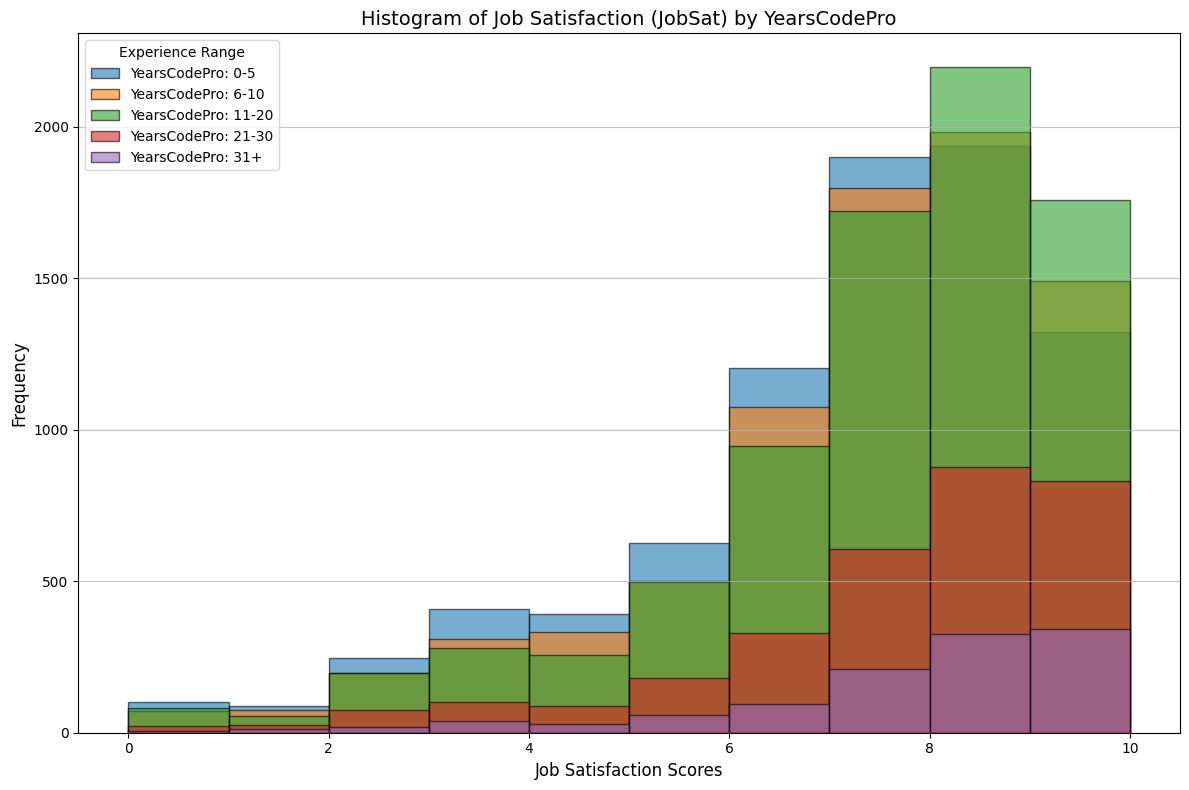

In [18]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to retrieve JobSat and YearsCodePro columns
QUERY = """
SELECT JobSat, YearsCodePro 
FROM main 
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""

# Load the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Map YearsCodePro to numeric values
years_code_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}
df['YearsCodePro'] = df['YearsCodePro'].replace(years_code_mapping)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with invalid or missing YearsCodePro
df = df.dropna(subset=['YearsCodePro'])

# Check the unique JobSat values to ensure data consistency
print("Unique JobSat values:", df['JobSat'].unique())

# Plot histograms of JobSat for specific ranges of YearsCodePro
# Define ranges of professional experience for categorization
bins = [0, 5, 10, 20, 30, 50]
labels = ['0-5', '6-10', '11-20', '21-30', '31+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Group data by ExperienceRange and plot histograms
plt.figure(figsize=(12, 8))

for label in labels:
    subset = df[df['ExperienceRange'] == label]
    if not subset.empty:
        plt.hist(
            subset['JobSat'],
            bins=10,
            alpha=0.6,
            label=f'YearsCodePro: {label}',
            edgecolor='k'
        )

# Add legend, labels, and title
plt.title('Histogram of Job Satisfaction (JobSat) by YearsCodePro', fontsize=14)
plt.xlabel('Job Satisfaction Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Experience Range')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Show the plot
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [19]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
